# Cifar-10 Image Classification

Link to dataset used: https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


We load our dataset into train and test (it is recognised automatically and we won't need to manually do the train/test split)

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


Now we prepare our labels("categorical") mentioned in the dataset link(in order)

In [6]:
classification = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [3]:
#We check the shape of our input and output:
print("shape of input is:",x_train.shape)
print("shape of output is:",y_train.shape)

shape of input is: (50000, 32, 32, 3)
shape of output is: (50000, 1)


This means that we will be using input shape(32, 32, 3)

Now let's take a look at some samples of our training set(how our model is supposed to predict)

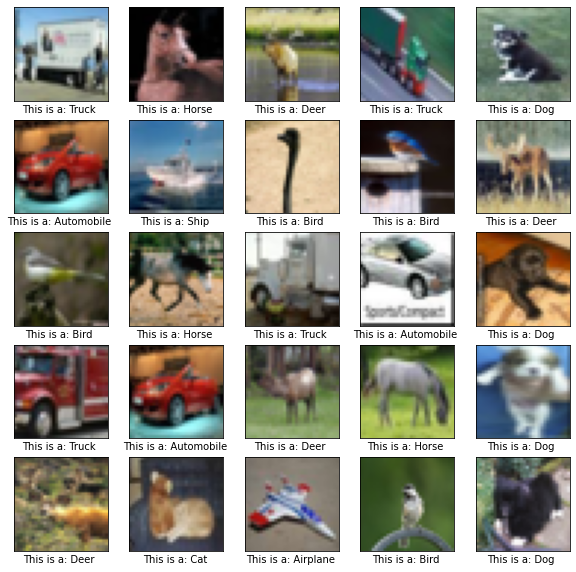

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 100)
    plt.imshow(x_train[img_index], cmap=plt.cm.gray)
    plt.xlabel("This is a: {} ".format(classification[y_train[img_index][0]]))

Now we prepare our output shape for the layer(using one hot encoding)

In [15]:
y_hot_train= to_categorical(y_train)
y_hot_test = to_categorical(y_test)

We normalize our image vectors

In [16]:
x_trainee = x_train /255
x_testee = x_test /255

Moving on to the model (CNN (conv 2D because we are dealing with images) and DNN in order to have a more consistentcy and details))

In [18]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

We use the relu function for the hidden layers and softmax for the output, since Relu is optimal for hidden layers while softmax is more oriented towards the final layer

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [20]:
history_model = model.fit(x_trainee, y_hot_train, epochs=10, batch_size=256, validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 55s 342ms/step - loss: 1.9988 - accuracy: 0.2405 - val_loss: 1.4886 - val_accuracy: 0.4670
Epoch 2/10
157/157 [==============================] - 52s 333ms/step - loss: 1.4270 - accuracy: 0.4769 - val_loss: 1.2853 - val_accuracy: 0.5306
Epoch 3/10
157/157 [==============================] - 52s 331ms/step - loss: 1.2296 - accuracy: 0.5606 - val_loss: 1.1127 - val_accuracy: 0.6081
Epoch 4/10
157/157 [==============================] - 52s 329ms/step - loss: 1.0880 - accuracy: 0.6143 - val_loss: 1.0950 - val_accuracy: 0.6176
Epoch 5/10
157/157 [==============================] - 52s 333ms/step - loss: 0.9666 - accuracy: 0.6573 - val_loss: 1.1192 - val_accuracy: 0.6246
Epoch 6/10
157/157 [==============================] - 53s 341ms/step - loss: 0.8893 - accuracy: 0.6902 - val_loss: 0.9569 - val_accuracy: 0.6708
Epoch 7/10
157/157 [==============================] - 58s 371ms/step - loss: 0.7916 - accuracy: 0.7211 - val_loss: 0.9007 - val_ac

In [21]:
test_loss, test_accuracy = model.evaluate(x_testee, y_hot_test, batch_size=256)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

40/40 [==============================] - 3s 83ms/step - loss: 0.9110 - accuracy: 0.7059
Test loss: 0.9110 accuracy: 0.7059


We got an accuracy of 70% for the test data now let's visualize our accuracy and value loss

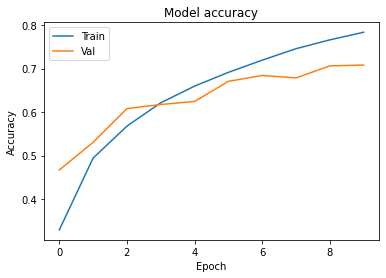

In [22]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

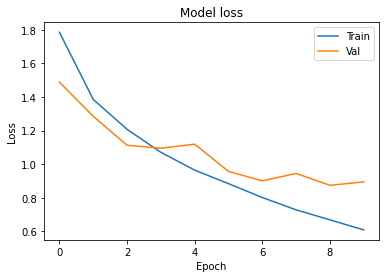

In [23]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Now let's try to use a photo from outside the dataset and test our model on it

In [27]:
testing_image = plt.imread("airp.jpg")

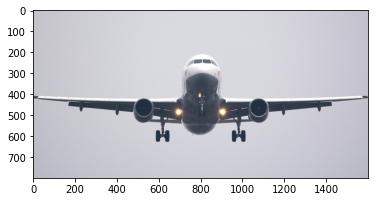

In [28]:
img = plt.imshow(testing_image)

We need to reshape the image for the model

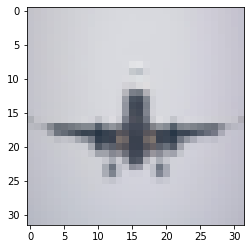

In [30]:
from skimage.transform import resize
resize_image = resize(testing_image, (32,32,3))
img = plt.imshow(resize_image)

In [35]:
prediction= model.predict(np.array([resize_image]))

In [36]:
prediction

array([[9.9963188e-01, 3.8930989e-07, 1.6223181e-04, 5.7078176e-07,
        6.1843079e-05, 4.4285876e-08, 5.1568762e-08, 5.5260057e-07,
        1.3825829e-04, 4.1113813e-06]], dtype=float32)

Now we only keep the index of the highest value predicted

In [37]:
predicted_label=np.argmax(prediction,axis=1)

In [40]:
print("The predicted label for this image is",classification[predicted_label[0]])

The predicted label for this image is Airplane


In [ ]:
Our model predicted susccessfully!